In [1]:
'''초기 세팅'''

import pandas as pd
import matplotlib.pyplot as plt #matplotlib 라이브러리
import seaborn as sns #seaborn 라이브러리


# 한글 폰트 입력
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [2]:
'''데이터 프레임 추출'''

#df 추출
import pandas as pd
df = pd.read_csv('data/건강보험심사평가원_시군구별 성별 연령군별 당뇨병 진료 통계 2019~2023_.csv', encoding = 'cp949')
df

,진료년도,시도,시군구,성별,연령군,환자수,입내원일수,요양급여비용총액
0,2019.0,서울,강남구,남,0~9세,20.0,102.000000,4.086118e+07
1,2019.0,서울,강남구,남,10~19세,162.0,701.000000,6.918703e+07
2,2019.0,서울,강남구,남,20~29세,461.0,1708.000000,1.441846e+08
3,2019.0,서울,강남구,남,30~39세,1846.0,6865.000000,4.071153e+08
4,2019.0,서울,강남구,남,40~49세,5352.0,22470.000000,1.059677e+09
...,...,...,...,...,...,...,...,...
27936,2023.0,세종,세종시,여,70~79세,1751.0,10655.000000,3.984844e+08
27937,2023.0,세종,세종시,여,80~89세,963.0,6383.000000,2.403809e+08
27938,2023.0,세종,세종시,여,90~99세,95.0,529.000000,1.862969e+07
27939,2023.0,세종,세종시,여,100세 이상,0.0,0.000000,0.000000e+00


In [17]:
'''전처리'''

# Step 1: Combine '시도' and '시군구' into unified values
df['시도'] = '통합'
df['시군구'] = '통합'

# Step 2: Map '연령군' into two categories: '0~49세' and '50~100세이상'
age_mapping = {
    '0~9세': '0~49세', '10~19세': '0~49세', '20~29세': '0~49세',
    '30~39세': '0~49세', '40~49세': '0~49세',
    '50~59세': '50~100세이상', '60~69세': '50~100세이상',
    '70~79세': '50~100세이상', '80~89세': '50~100세이상',
    '90~99세': '50~100세이상', '100세 이상': '50~100세이상'
}
df['연령군'] = df['연령군'].map(age_mapping)

# Step 3: Group by '진료년도', '시도', '시군구', and '연령군' and sum numerical columns
df2 = df.groupby(['진료년도', '시도', '시군구', '연령군'], as_index=False).agg({
    '환자수': 'sum',
    '입내원일수': 'sum',
    '요양급여비용총액': 'sum'
})

# Step 4: Add new calculated columns for averages
df2['1인당 평균 입내원일수'] = df2['입내원일수'] / df2['환자수']
df2['1인당 평균 요양 급여비용'] = df2['요양급여비용총액'] / df2['환자수']

# Step 5: Create a new DataFrame df3 and convert specified columns to integers
df3 = df2.copy()
columns_to_convert = ['진료년도', '환자수', '입내원일수', '요양급여비용총액', '1인당 평균 입내원일수', '1인당 평균 요양 급여비용']
df3[columns_to_convert] = df3[columns_to_convert].round().astype(int)

# **컬럼명을 문자열(str) 타입으로 변환**
df3.columns = df3.columns.astype(str)

# Display the final processed DataFrame
print(df3.head())


   진료년도  시도 시군구        연령군      환자수     입내원일수    요양급여비용총액  1인당 평균 입내원일수  \
0  2019  통합  통합      0~49세   593573   3243821 -2147483648             5   
1  2019  통합  통합  50~100세이상  3162078  21302542 -2147483648             7   
2  2020  통합  통합      0~49세   599986   3244700 -2147483648             5   
3  2020  통합  통합  50~100세이상  3278480  21430891 -2147483648             7   
4  2021  통합  통합      0~49세   639966   3415065 -2147483648             5   

   1인당 평균 요양 급여비용  
0          236079  
1          250460  
2          243030  
3          250748  
4          251050  


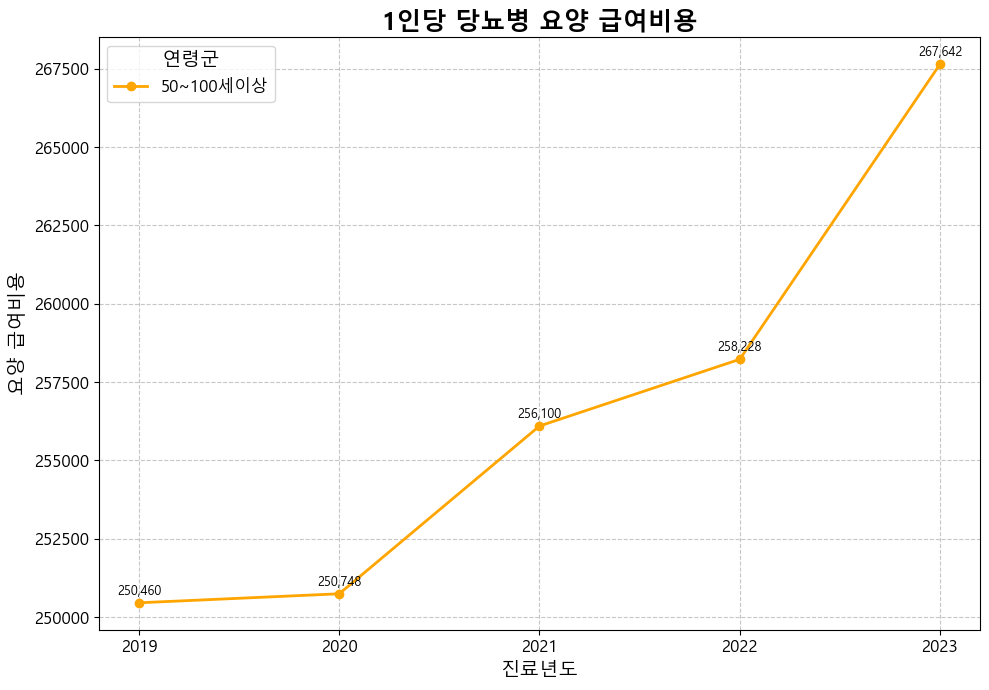

In [62]:
'''요양 급여비용 선그래프 시각화'''

import matplotlib.pyplot as plt

# 꺾은선 그래프: '0~49세'를 제외한 연령군별 진료년도에 따른 1인당 평균 요양 급여비용 (주황색 적용)
plt.figure(figsize=(10, 7))

for age_group in df3['연령군'].unique():
    if age_group != '0~49세':  # '0~49세'를 제외
        subset = df3[df3['연령군'] == age_group]
        plt.plot(subset['진료년도'], subset['1인당 평균 요양 급여비용'], marker='o', label=f'{age_group}', 
                 linewidth=2, color='orange')  # 🔸 그래프 선을 주황색으로 변경

        # 도트값 표시 (위치 조정)
        for x, y in zip(subset['진료년도'], subset['1인당 평균 요양 급여비용']):
            plt.text(x, y + (y * 0.001), f'{y:,}', fontsize=9, ha='center', color='black')  # 천 단위 쉼표 추가 및 색상 변경

# 그래프 꾸미기
plt.title('1인당 당뇨병 요양 급여비용', fontsize=18, fontweight='bold')
plt.xlabel('진료년도', fontsize=14)
plt.ylabel('요양 급여비용', fontsize=14)
plt.legend(title='연령군', fontsize=12, title_fontsize=14, loc='upper left')

# X축을 연도(정수)로만 표시
plt.xticks(df3['진료년도'].unique(), fontsize=12)  # 고유한 연도 값만 X축에 표시

plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # 그래프 요소가 겹치지 않도록 조정

# 🔹 저장을 먼저 수행 (plt.show() 이후 실행하면 빈 이미지가 저장될 수 있음)
plt.savefig('요양 급여비용.png', dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()


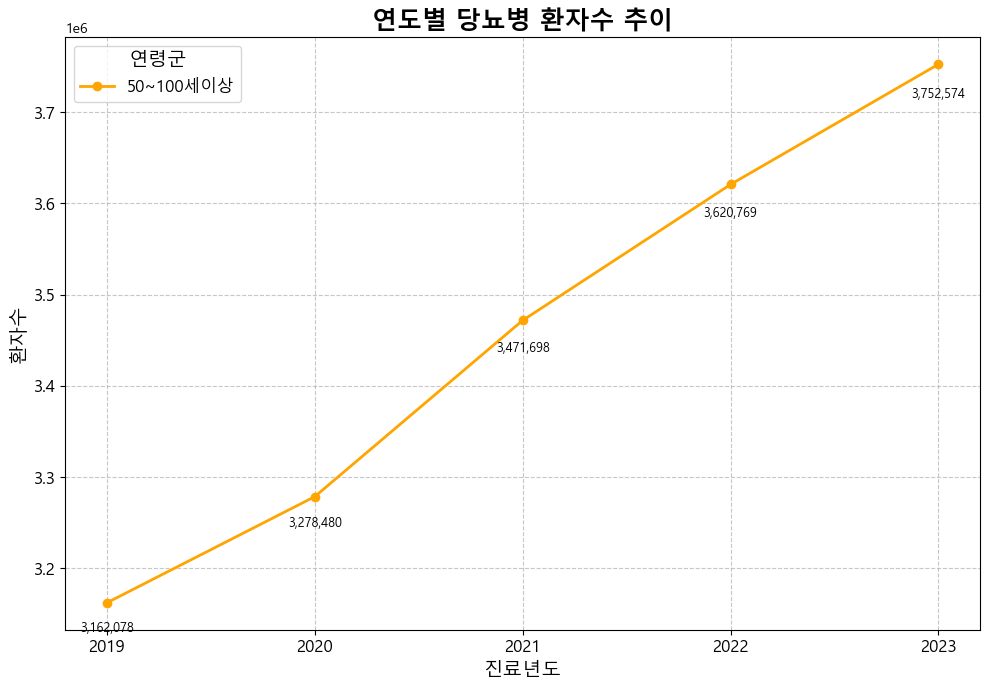

In [63]:
'''당뇨환자 수 선그래프 시각화'''

import matplotlib.pyplot as plt

# 꺾은선 그래프: '0~49세'를 제외한 연령군별 진료년도에 따른 환자수 (주황색 적용)
plt.figure(figsize=(10, 7))

for age_group in df3['연령군'].unique():
    if age_group != '0~49세':  # '0~49세'를 제외
        subset = df3[df3['연령군'] == age_group]
        plt.plot(subset['진료년도'], subset['환자수'], marker='o', label=f'{age_group}', 
                 linewidth=2, color='orange')  # 🔸 그래프 선을 주황색으로 변경

        # 도트값 표시 (위치 조정)
        for x, y in zip(subset['진료년도'], subset['환자수']):
            plt.text(x, y - (y * 0.01), f'{y:,}', fontsize=9, ha='center', color='black')  # 천 단위 쉼표 추가 및 색상 변경

# 그래프 꾸미기
plt.title('연도별 당뇨병 환자수 추이', fontsize=18, fontweight='bold')
plt.xlabel('진료년도', fontsize=14)
plt.ylabel('환자수', fontsize=14)

# X축을 연도(정수)로만 표시
plt.xticks(df3['진료년도'].unique(), fontsize=12)

plt.yticks(fontsize=12)
plt.legend(title='연령군', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # 그래프 요소가 겹치지 않도록 조정

# 🔹 그래프를 먼저 저장 (plt.show() 이후 실행하면 빈 이미지가 저장될 수 있음)
plt.savefig('당뇨병 환자 수.png', dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()
